In [141]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [142]:
os.chdir("/home/vladimir/conda")

In [143]:
df = pd.read_csv("Econom_Cities_data.csv", sep=";",index_col="City",decimal=",")

In [144]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
df[:]

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


Как видим, у Каира и Джакарты значения двух полей равны $-9999$. Это выбросы, очевидно, удалим их.

In [145]:
df=df.drop(index=["Cairo","Jakarta"])

Также заметим, что если мы хотим использовать евклидову метрику, то переменная Work будет иметь определяющий вклад. Возьмём значение в Цюрихе за $100$ % и будем использовать проценты, как и в других столбцах.

In [ ]:
df["Work"]=df["Work"]/1868*100

In [147]:
link = linkage(df, 'ward', 'euclidean')

In [148]:
print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(45, 4)


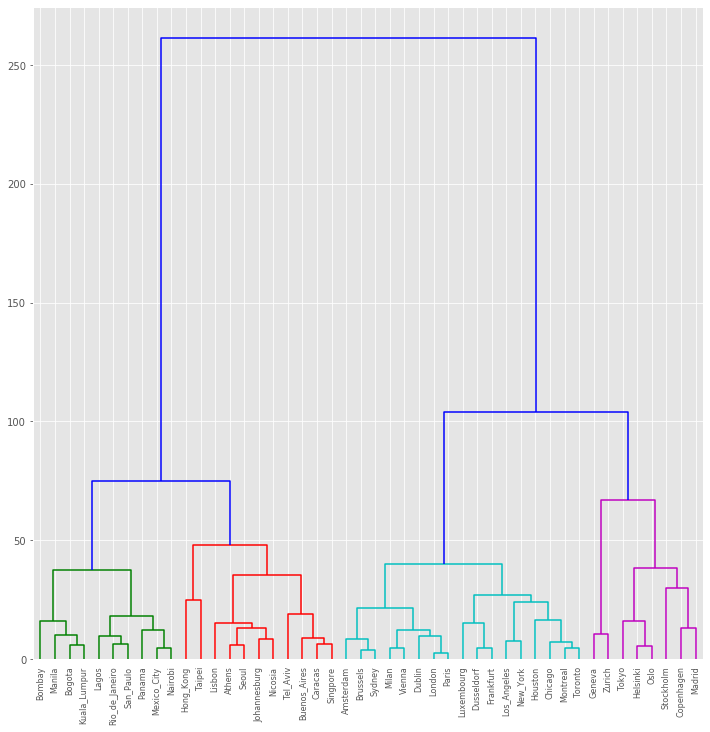

In [168]:
fig = plt.figure(figsize=(12,12))
dn = dendrogram(link, color_threshold = 73,                 
                # массив с названиями объектов для подписи по оси X
                labels=df.index.tolist())

Кластеры выглядят достаточно симпатично, несмотря на то, что крайний справа слегка выделяется.

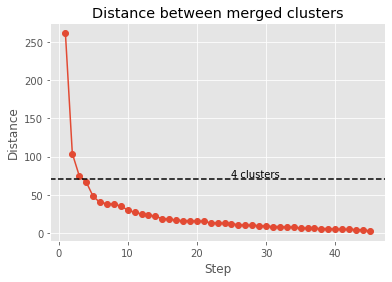

In [175]:
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.text(25, 73, '4 clusters')
plt.axhline(70, c='k', linestyle='dashed')

Как видно из каменистой осыпи, мы вовремя остановились.

In [162]:
# Останавливаем объединение, когда 4 кластера
df['cluster'] = fcluster(link, 4, criterion='maxclust')

In [165]:
df.groupby('cluster').size()

cluster
1    10
2    11
3    17
4     8
dtype: int64

Размер кластеров варьируется, попытаемся их проинтерпретировать.

In [178]:
df[df['cluster']==3].index.values

array(['Amsterdam', 'Brussels', 'Chicago', 'Dublin', 'Dusseldorf',
       'Frankfurt', 'Houston', 'London', 'Los_Angeles', 'Luxembourg',
       'Milan', 'Montreal', 'New_York', 'Paris', 'Sydney', 'Toronto',
       'Vienna'], dtype=object)

Получилось, что нумерация кластеров совпадает с изображённой на дендрограмме (кластеры пронумерованны слева направо).

In [166]:
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,107.119914,43.610000,8.030000
2,105.776718,60.381818,23.909091
3,96.425872,75.758824,55.005882
4,94.419165,104.550000,67.587500


1. Первый кластер - крупные города третьего мира(Африки, Юго-Восточной Азии, Южной Америки). Сильно выбивается уровень заработной платы в час, который в 12 раз ниже, чем в Цюрихе. При этом цены в половину меньше(в среднем). Люди в этих городах больше всех работают и меньше всех зарабатывают.
2. Второй кластер - столицы и другие города развивающихся стран (исследование выполнено в 1991 году, сейчас бы в этом кластере вряд ли оказались Сеул, Тель-Авив, Гонконг, Тайпей). Картина напоминает первый кластер, но средняя зарплата в час в три раза больше, а цены - в полтора. Оба первых кластера в среднем 'перерабатывают', по сравнению с Цюрихом.
3. Третий кластер - развитые европейские и американские города (+Сидней). В этом кластере средняя зарплата в час еще в 2.3 раза больше, чем в предыдущем. Заметно снижение среднего числа рабочих часов ниже уровня Цюриха.
4. Четвёртый кластер - самые современные на 1991 европейские города + Токио. В этих городах люди работают меньше всего, получая наибольшую зарплату в час (= самые продуктивные). Соответсвуют зарплатам цены - в среднем выше даже уровня Цюриха(вероятно, слишком дорогая недвижимость).